In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

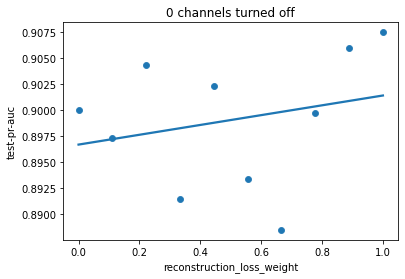

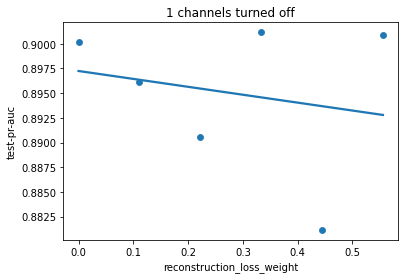

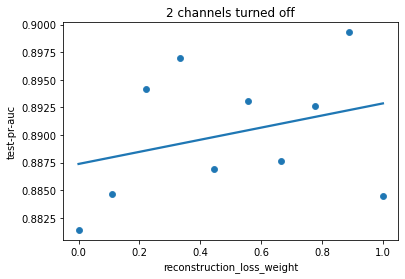

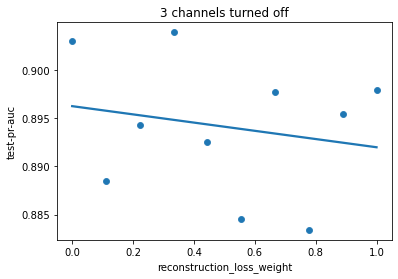

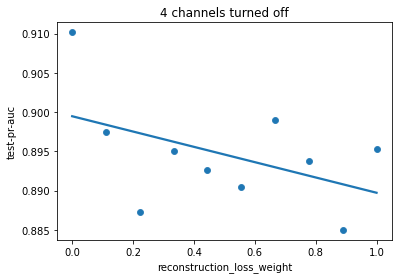

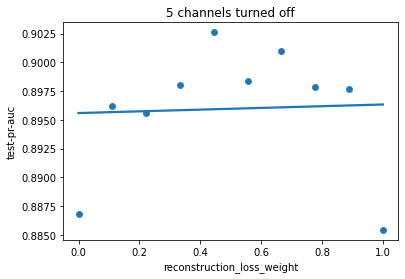

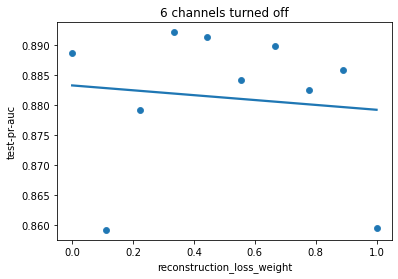

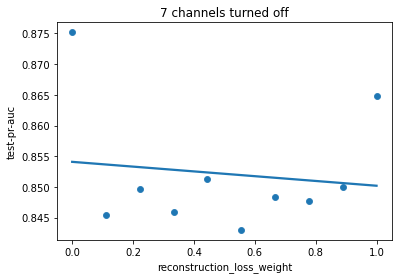

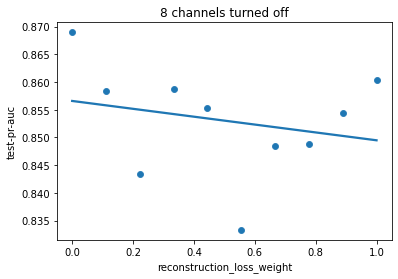

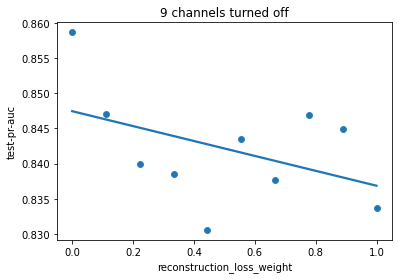

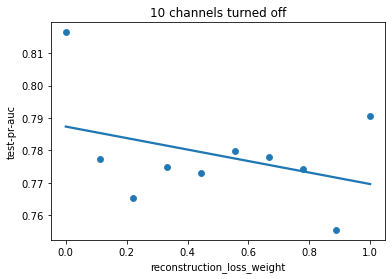

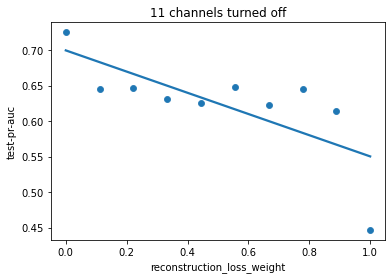

In [2]:
import pandas as pd
for j in range(12):
    try:
        with open(f'/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-{j}_channels_off-no_additional_noise-impute_only_missing-reconstruction_loss/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
            b = pickle.load(handle)

        results = pd.DataFrame(b)
        sns.scatterplot(data=results, x='reconstruction_loss_weight', y='test-pr-auc')
        sns.regplot(data=results, x='reconstruction_loss_weight', y='test-pr-auc',ci=None)
        plt.title(f'{j} channels turned off')
        plt.show()
    except:
        continue


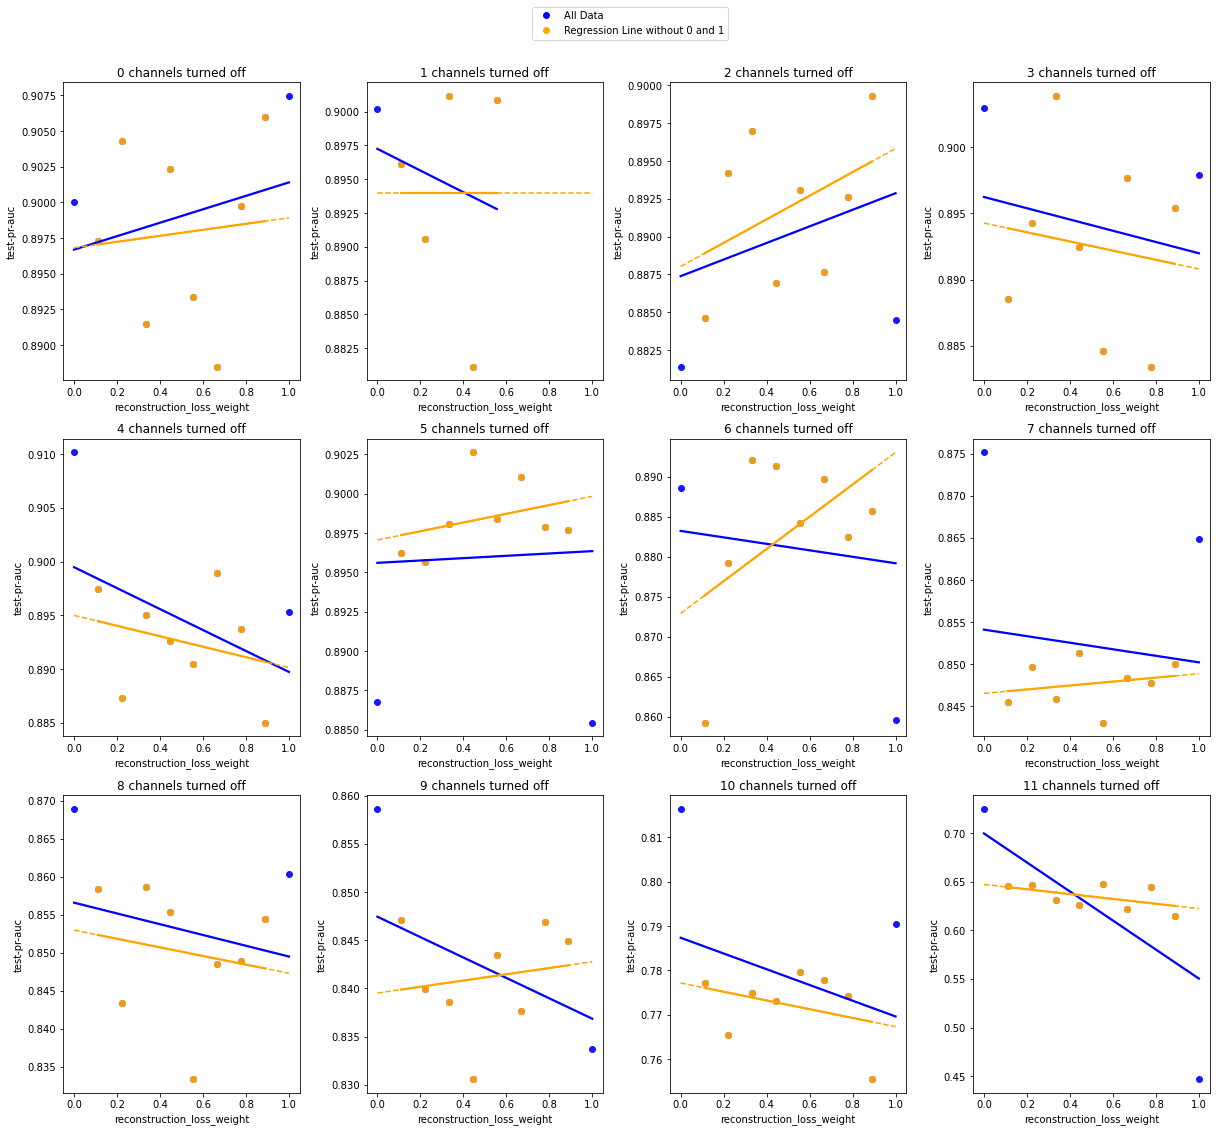

In [23]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Set up the figure and axes for a 3x4 subplot
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Initialize lists to collect legend handles and labels
handles, labels = [], []

for j in range(12):  # Loop through 12 channels
    try:
        with open(f'/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-{j}_channels_off-no_additional_noise-impute_only_missing-reconstruction_loss/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
            b = pickle.load(handle)

        results = pd.DataFrame(b)

        # Filter out points where reconstruction_loss_weight is 0 or 1
        filtered_results = results[(results['reconstruction_loss_weight'] != 0) & (results['reconstruction_loss_weight'] != 1)]

        ax = axes[j]  # Select the current subplot axis

        # Plot full data
        scatter_full = sns.scatterplot(data=results, x='reconstruction_loss_weight', y='test-pr-auc', ax=ax, color='blue', alpha=0.5)
        sns.regplot(data=results, x='reconstruction_loss_weight', y='test-pr-auc', ax=ax, ci=None, color='blue')

        # Plot filtered data
        scatter_filtered = sns.scatterplot(data=filtered_results, x='reconstruction_loss_weight', y='test-pr-auc', ax=ax, color='orange', alpha=0.7)
        sns.regplot(data=filtered_results, x='reconstruction_loss_weight', y='test-pr-auc', ax=ax, ci=None, color='orange')

        # Extrapolate the filtered data
        X = filtered_results['reconstruction_loss_weight']
        y = filtered_results['test-pr-auc']
        
        # Fit a linear model
        X = sm.add_constant(X)  # Add a constant term for the intercept
        model = sm.OLS(y, X).fit()

        # Generate points for extrapolation
        x_vals = np.linspace(0, 1, 100)
        x_vals_const = sm.add_constant(x_vals)  # Add constant term for prediction
        y_vals_extrapolated = model.predict(x_vals_const)

        # Plot the extrapolated line as dashed
        ax.plot(x_vals, y_vals_extrapolated, color='orange', linestyle='--')

        ax.set_title(f'{j} channels turned off')

        # Collect handles and labels for the legend from the first plot
        if j == 0:
            handles = [
                plt.Line2D([0], [0], marker='o', color='w', label='All Data', markerfacecolor='blue', markersize=8),
                plt.Line2D([0], [0], marker='o', color='w', label='Filtered Data', markerfacecolor='orange', markersize=8)
                # Excluded the extrapolated line from the handles
            ]
            labels = ['All Data', 'Regression Line without 0 and 1']  # Updated labels accordingly

    except Exception as e:
        print(f"Error for channel {j}: {e}")

# Create a single legend outside the subplots
# fig.legend(handles, labels, loc='center right', fontsize='medium')
fig.legend(handles, labels, loc='upper center', fontsize='medium', bbox_to_anchor=(0.44, 1.05))

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.show()
